# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
student_data = pd.DataFrame({
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # List of student IDs
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],  # List of ages
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]  # List of tardies
})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

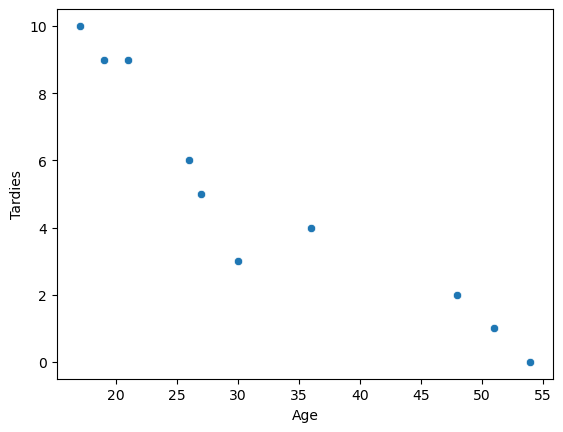

In [4]:
# Your code here.
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# indeed the younger your students are, the more often they are late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
# Your response here.

#covariance:
covariance_matrix = student_data[['Age', 'Tardies']].cov()
print("Covariance Matrix:")
print(covariance_matrix) # Covariance measures how two variables change together. A positive covariance indicates that they tend to increase or decrease together, while a negative covariance suggests that as one increases, the other decreases. Zero or near-zero covariance implies no linear relationship.
print()
#correlation:
correlation_matrix = student_data[['Age', 'Tardies']].corr()
print("\nCorrelation Matrix:")
print(correlations_matrix) # Correlation is a normalized measure of covariance, providing a value between -1 and 1, indicating the strength and direction of the linear relationship between two variables.


Covariance Matrix:
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Correlation Matrix:
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.
# apply linear regression on the following data

from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols

Y = student_data['Tardies']
X = student_data['Age']

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.57e-05
Time:                        11:49:29   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

<Axes: xlabel='Age', ylabel='Tardies'>

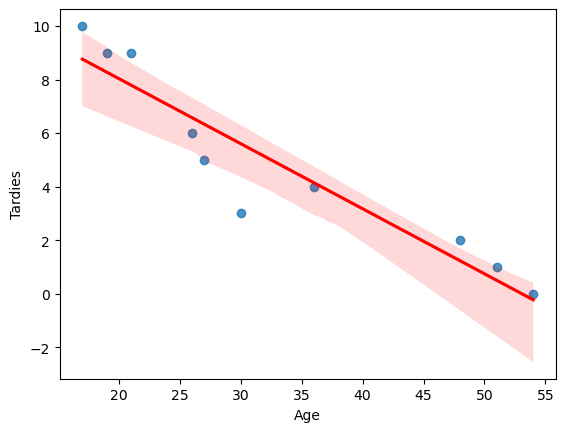

In [13]:
# Your code here.
# Plot a scatter plot and fit a regression model
sns.regplot(x='Age', y='Tardies', data=student_data, scatter=True, line_kws={"color": "red"})

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [16]:
# Your response here. 

# The root mse of the model is =  1.154, meaning the predictions are very close to reality, missing real datapoints by an average of 1 point
# we can be very confident in the conclusion that age is a good predictor of tardiness

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.88
The intercept of the model is =  12.888803363135773
The coefficients of the model are =  [ 0.         -0.24282077]
The mse of the model is =  1.3319201847356268
The root mse of the model is =  1.1540884648655088
The mean absolute error of the model is =  0.931908342708272


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
# Import any libraries you may need & the data

vehicles = pd.read_csv(r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\Optional Labs\lab-regression-analysis\your-code\vehicles.csv")

cols = []
for i in range(len(vehicles.columns)): 
    cols.append(vehicles.columns[i].lower().replace(' ', '_'))
vehicles.columns = cols
vehicles

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams/mile,fuel_cost/year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [23]:
# Your response here. 
correlations_matrix = vehicles[['year', 'cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year', 'co2_emission_grams/mile']].corr()
correlations_matrix

,year,cylinders,fuel_barrels/year,combined_mpg,fuel_cost/year,co2_emission_grams/mile
year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
fuel_barrels/year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
combined_mpg,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
fuel_cost/year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
co2_emission_grams/mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [27]:
vehicles_cor = vehicles[['year', 'cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year', 'co2_emission_grams/mile']]
correlations = vehicles_cor.corr()['co2_emission_grams/mile']
correlations.sort_values(ascending=False)

# 'fuel_barrels/year', and 'fuel_cost/year' have the strongest positive correlations with 'co2_emission_grams/mile'

co2_emission_grams/mile    1.000000
fuel_barrels/year          0.986189
fuel_cost/year             0.930865
cylinders                  0.752393
year                      -0.222300
combined_mpg              -0.926229
Name: co2_emission_grams/mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
# Your response here. 
Y = vehicles['co2_emission_grams/mile']
X = vehicles[['year', 'cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year']]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams/mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                             13:11:55   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
fuel_barrels/year    19.0529      0.061    311.600      0.000      18.933      19.173
combined_mpg         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuel_cost/year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [29]:
# Your response here. 
# The root mse of the model is =  16.46, meaning the predictions are relatively close to reality, since co2_emission_grams/mile have its units in hundreds of grams/mile

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.98
The intercept of the model is =  769.8882836465273
The coefficients of the model are =  [ 0.         -0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
The mse of the model is =  271.11965507029976
The root mse of the model is =  16.465711496024085
The mean absolute error of the model is =  7.4876688071210715


<Axes: xlabel='fuel_barrels/year', ylabel='co2_emission_grams/mile'>

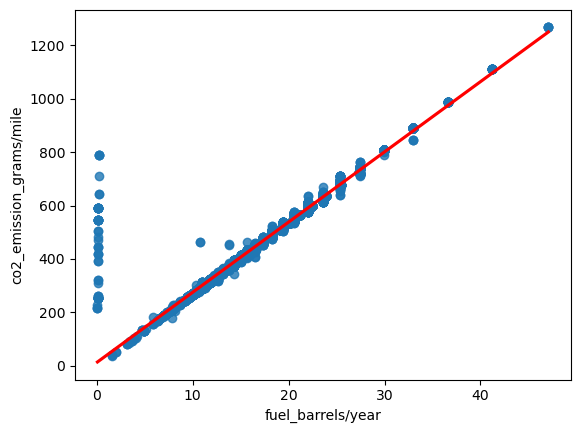

In [30]:
# let's plot the positive correlations from our model
'''
fuel_barrels/year          0.986189
fuel_cost/year             0.930865
cylinders                  0.752393'''

sns.regplot(x='fuel_barrels/year', y='co2_emission_grams/mile', data=vehicles, scatter=True, line_kws={"color": "red"})
# there's a number of outliers at 0 'fuel_barrels/year'

<Axes: xlabel='fuel_cost/year', ylabel='co2_emission_grams/mile'>

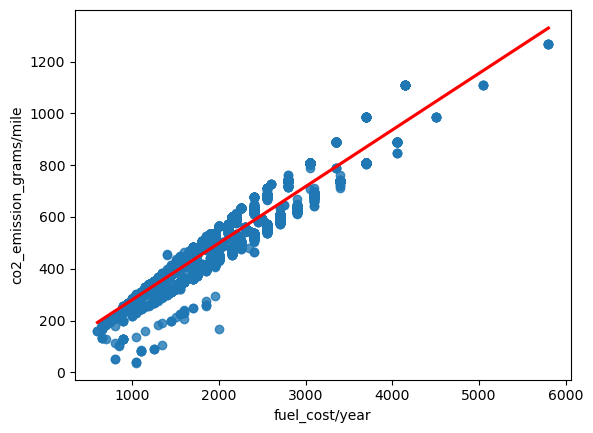

In [31]:
sns.regplot(x='fuel_cost/year', y='co2_emission_grams/mile', data=vehicles, scatter=True, line_kws={"color": "red"})
# predictions were more precise below 3000 fuel_cost/year

<Axes: xlabel='cylinders', ylabel='co2_emission_grams/mile'>

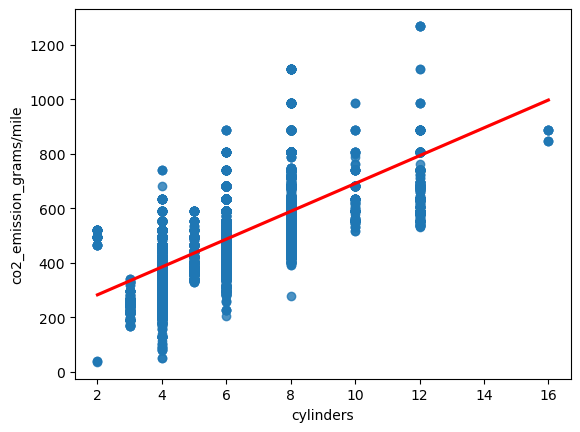

In [32]:
sns.regplot(x='cylinders', y='co2_emission_grams/mile', data=vehicles, scatter=True, line_kws={"color": "red"})
# this graph is not linear, it's vey hard to see the correlation of the variables

<Axes: xlabel='combined_mpg', ylabel='co2_emission_grams/mile'>

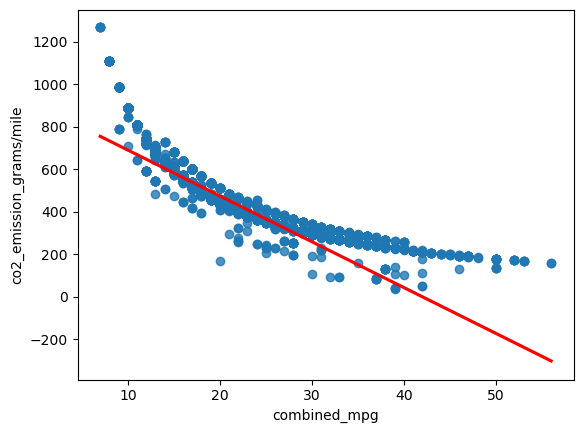

In [36]:
# let's plot the negative correlations from our model
'''
year                      -0.222300
combined_mpg              -0.926229'''

sns.regplot(x='combined_mpg', y='co2_emission_grams/mile', data=vehicles, scatter=True, line_kws={"color": "red"})
# data points form a curve rather than a line

<Axes: xlabel='year', ylabel='co2_emission_grams/mile'>

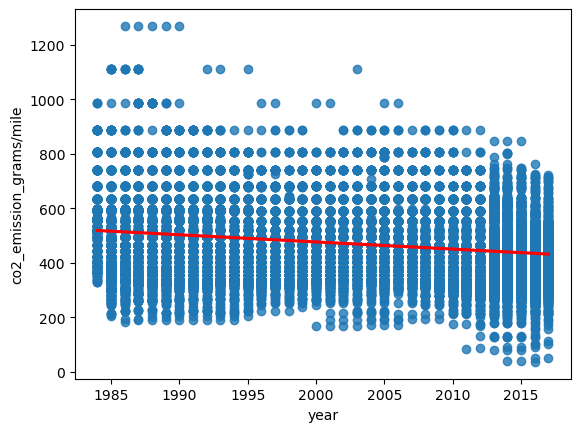

In [37]:
sns.regplot(x='year', y='co2_emission_grams/mile', data=vehicles, scatter=True, line_kws={"color": "red"})
# there almost no correlation between year and co2_emission_grams/mile

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [43]:
# Your code here.
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}
df = pd.DataFrame(data)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<Axes: xlabel='X', ylabel='Y'>

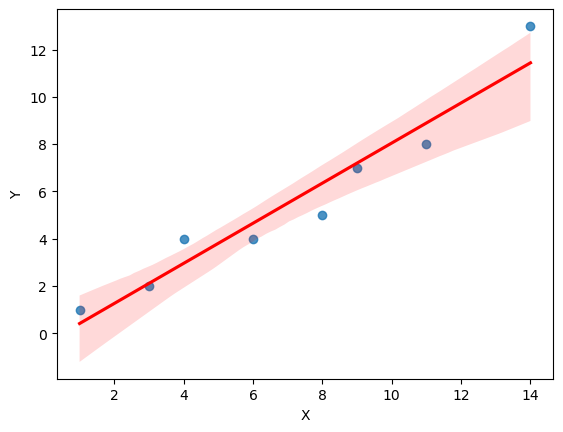

In [44]:
# Your code here.
sns.regplot(x='X', y='Y', data=df, scatter=True, line_kws={"color": "red"})

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [45]:
# Your response here. 
correlations_matrix = df.corr()
correlations_matrix

# there is a high correlation between X and Y

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


In [46]:
Y = df['Y']
X = df[['X']]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           0.000102
Time:                        16:43:54   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.93
The intercept of the model is =  -0.4393939393939412
The coefficients of the model are =  [0.         0.84848485]
The mse of the model is =  0.8712121212121211
The root mse of the model is =  0.9333874443188751
The mean absolute error of the model is =  0.7992424242424243


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [54]:
# Your response here. 
# two data points are further from the line 4/4 and 14/13
df = df.drop(df[(df['X'] == 4) | (df['X'] == 14)].index)
df

,X,Y
0,1,1
1,3,2
3,6,4
4,8,5
5,9,7
6,11,8


In [55]:
Y = df['Y']
X = df[['X']]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

C:\Users\fabi_\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     140.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           0.000290
Time:                        16:51:15   Log-Likelihood:                -3.2485
No. Observations:                   6   AIC:                             10.50
Df Residuals:                       4   BIC:                             10.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0280      0.435     -0.064      0.952      -1.235       1.179
X              0.7150      0.060     11.857      0.000       0.548       0.882
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.147
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.285
Skew:                          -0.246   Prob(JB):                        0.867
Kurtosis:                       2.052   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.97
The intercept of the model is =  -0.028037383177566433
The coefficients of the model are =  [0.         0.71495327]
The mse of the model is =  0.17289719626168223
The root mse of the model is =  0.4158090863144795
The mean absolute error of the model is =  0.3566978193146421


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

<Axes: xlabel='X', ylabel='Y'>

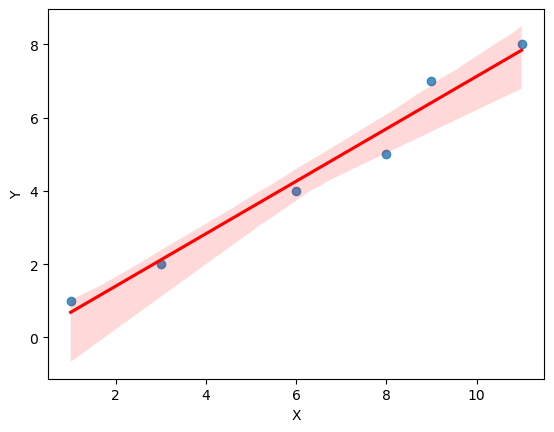

In [57]:
# Your response here. 
# The root mse of the model dropped to almost 0
# the data points removed are likely outliers

sns.regplot(x='X', y='Y', data=df, scatter=True, line_kws={"color": "red"})